In [5]:
from model_runner import Model_runner
from utilis.visualization import plot_Xtrain, plot_clustering, plot_boundary

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [11]:
nmr_cluster = Model_runner()
nmr_cluster.load_data(verbose=1).preprocess(verbose=1).fit(verbose=0)
#nmr_cluster.preprocess(verbose=1)
nmr_cluster.evaluate(verbose=1)

file info, Grid shape of [t1,t2]: (151, 121), log(t1) incremental: -0.03333, log(t2) incremental: -0.04167
Normalization : raw fluid volume 1.44242 , select fluid volume 1.17377, their ratio 0.814
X_trian shape:(10173, 2), X_manifold shape: (2689, 3)
adjust labels (remapping)
adjust labels (remapping)
model_name GMM, metrics ratios [2.9222517597300528, 5.619037388401253, 38.944463003198734, 10.925852142721878, 57.497951345447042], slopes [12.983852559378967, 5.0317624914722998, 6.7755598372853001], inters[0.12308210109873596, 0.67415671814890343, 1.7153006779740463]
model_name kmean, metrics ratios [17.831194818005105, 39.664708812394579, 44.322676563578717, 45.770392985993404, 57.497951345447042], slopes [52.145193408894237, 43.709174937052104, 44.074890224904543], inters[-0.82480662839644081, 0.013223629602238732, 0.74581882677880429]


In [12]:
slopes = nmr_cluster.metrics['slopes']['GMM']
slopes_raw = nmr_cluster.metrics['slopes_raw']['GMM']
inters = nmr_cluster.metrics['inters']['GMM']
print(slopes_raw)

[57.983852559378967, 50.0317624914723, 38.2244401627147]


[-1.5  1. ] [-1.39493161  1.13509124]
[-1.5  1. ] [-0.63567176  1.5473757 ]
[-1.5  1. ] [ 0.71458717  2.38244301]


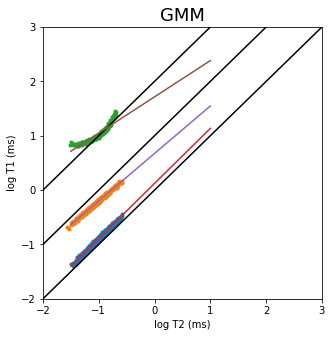

In [14]:
plot_boundary(nmr_cluster.boundary_points['GMM'], 'GMM')

for i in range(3):
    x = np.array([-1.5, 1])
    y = x*slopes_raw[i]*np.pi/180 + inters[i]
    print(x,y)
    plt.plot(x,y)
#plt.plot([-2,3],[1.05,1.05])
#plt.plot([-2,3],[0.5,0.5])

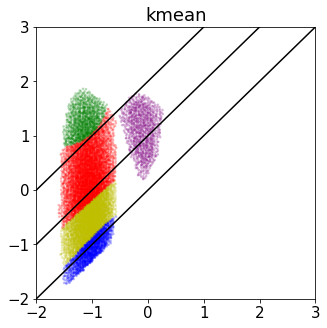

In [13]:
plot_clustering(nmr_cluster.X_train, nmr_cluster.y_preds['GMM'],model_name='kmean', plot_line=True,plot_save=False)